# Stock Forecasting

Time Series is a collection of data points collected at constant time intervals.
It is time dependent. 
Along with an increasing or decreasing trend, most TS have some form of seasonality trends, i.e. variations specific to a particular time frame. For example, if you see the sales of a woolen jacket over time, you will invariably find higher sales in winter seasons.

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Loading and Handling Time Series in Pandas

In [139]:
# load the raw data
apple = pd.read_csv("AAPL.csv")
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-02,1.151786,1.151786,1.133929,1.147321,0.993233,34823600
1,1996-01-03,1.142857,1.174107,1.138393,1.147321,0.993233,107458400
2,1996-01-04,1.156250,1.156250,1.120536,1.127232,0.975842,75045600
3,1996-01-05,1.129464,1.223214,1.120536,1.223214,1.058933,111482000
4,1996-01-08,1.232143,1.267857,1.214286,1.236607,1.070527,30335200


In [140]:
# identify the data type
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6193 entries, 0 to 6192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6193 non-null   object 
 1   Open       6193 non-null   float64
 2   High       6193 non-null   float64
 3   Low        6193 non-null   float64
 4   Close      6193 non-null   float64
 5   Adj Close  6193 non-null   float64
 6   Volume     6193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 338.8+ KB


# Time Series Data Structure
3 types of structures are used with TS data:
    - DatetimeIndex (mostly used)
    - PeriodIndex
    - TimedeltaIndex
Why do we need to convert the time into datetime while working with TS data?
Time series data can come in with so many different formats. But not all of those formats are friendly to python’s pandas’ library. The most convenient format is the timestamp format for Pandas. But most of the time time-series data come in string formats. That is the reason why we need to change the date type from object to timestamp.

We will make it to the DatetimeIndex format and put it as the index column.
Because when the ‘date’ column is the index column we will be able to resample it very easily. 

In [141]:
apple = pd.read_csv("AAPL.csv", parse_dates=['Date'], index_col="Date")
apple.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-31,411.540009,425.660004,403.299988,425.040009,425.040009,93584200
2020-08-03,432.799988,446.549988,431.570007,435.750000,435.750000,77037800
2020-08-04,436.529999,443.160004,433.549988,438.660004,438.660004,43267900
2020-08-05,437.510010,441.570007,435.589996,440.250000,440.250000,30498000
2020-08-06,441.619995,457.649994,439.190002,455.609985,455.609985,50490000


# Why is resampling important?
Because we do not always need all the data in a huge dataset. For example, we may need only the data from June 2019. 
If your date format is in DatetimeIndex, it is very easy:

In [142]:
apple['2019']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,154.889999,158.850006,154.229996,157.919998,154.794983,37039700
2019-01-03,143.979996,145.720001,142.000000,142.190002,139.376251,91312200
2019-01-04,144.529999,148.550003,143.800003,148.259995,145.326126,58607100
2019-01-07,148.699997,148.830002,145.899994,147.929993,145.002686,54777800
2019-01-08,149.559998,151.820007,148.520004,150.750000,147.766861,41025300
...,...,...,...,...,...,...
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.831299,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,288.442780,23280300
2019-12-27,291.119995,293.970001,288.119995,289.799988,288.333313,36566500


In [143]:
# Or we can get the data for a single day
apple.loc['2019-12-30']

Open         2.894600e+02
High         2.926900e+02
Low          2.852200e+02
Close        2.915200e+02
Adj Close    2.900446e+02
Volume       3.602860e+07
Name: 2019-12-30 00:00:00, dtype: float64

In [144]:
# Check if there is any missing data
apple.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [145]:
# dropping Close column, as we will use the Adjusted Close column for our model
apple = apple.drop('Close', axis=1)

In [146]:
apple = apple.rename(columns={"Adj Close": "Close"})

In [147]:
apple

,Open,High,Low,Close,Volume
Date,,,,,
1996-01-02,1.151786,1.151786,1.133929,0.993233,34823600
1996-01-03,1.142857,1.174107,1.138393,0.993233,107458400
1996-01-04,1.156250,1.156250,1.120536,0.975842,75045600
1996-01-05,1.129464,1.223214,1.120536,1.058933,111482000
1996-01-08,1.232143,1.267857,1.214286,1.070527,30335200
...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,425.040009,93584200
2020-08-03,432.799988,446.549988,431.570007,435.750000,77037800
2020-08-04,436.529999,443.160004,433.549988,438.660004,43267900


In [148]:
# Call the .corr() method on the apple dataset to view the relationships among the features of the dataset
apple.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999920,0.999916,0.998900,-0.359337
High,0.999920,1.000000,0.999868,0.999056,-0.357955
Low,0.999916,0.999868,1.000000,0.998961,-0.361110
Close,0.998900,0.999056,0.998961,1.000000,-0.360740
Volume,-0.359337,-0.357955,-0.361110,-0.360740,1.000000


<Figure size 432x288 with 0 Axes>

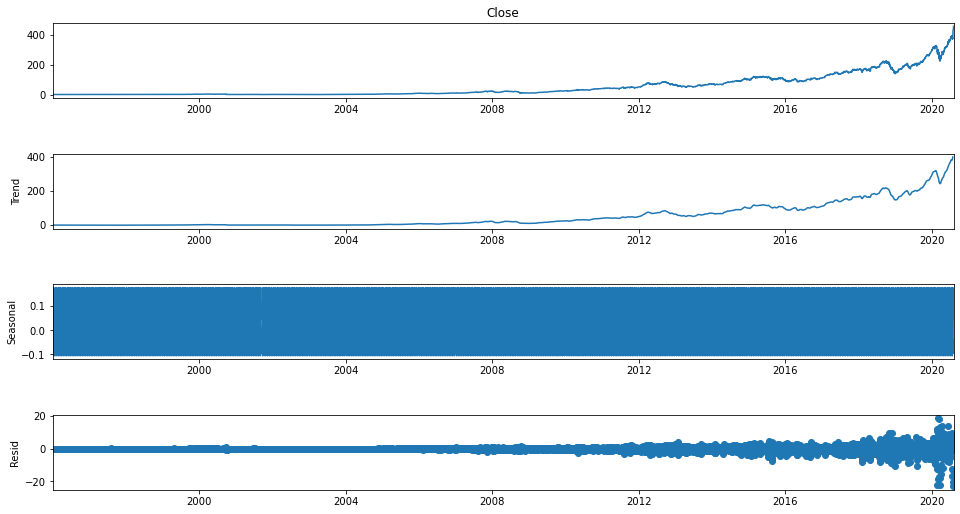

In [149]:
# Visualize the data to gain some insight
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(apple['Close'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations. 

In [150]:
trend = decomposition.trend
seasonal = decomposition.seasonal 
#residual = decomposition.residual  
trend,seasonal

(Date
 1996-01-02   NaN
 1996-01-03   NaN
 1996-01-04   NaN
 1996-01-05   NaN
 1996-01-08   NaN
               ..
 2020-07-31   NaN
 2020-08-03   NaN
 2020-08-04   NaN
 2020-08-05   NaN
 2020-08-06   NaN
 Name: trend, Length: 6193, dtype: float64,
 Date
 1996-01-02   -0.051986
 1996-01-03    0.008759
 1996-01-04   -0.036232
 1996-01-05   -0.105675
 1996-01-08    0.114776
                 ...   
 2020-07-31   -0.026454
 2020-08-03   -0.096059
 2020-08-04   -0.044672
 2020-08-05   -0.040719
 2020-08-06   -0.051986
 Name: seasonal, Length: 6193, dtype: float64)

# How to Check Stationarity of our TS data?

We can check stationarity using the following:
- Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months.

- Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [151]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

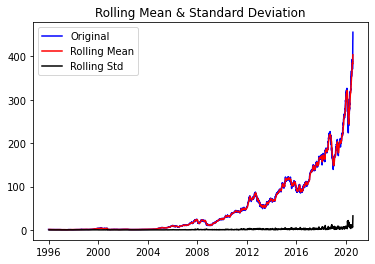

Results of Dickey-Fuller Test:
Test Statistic                    5.150154
p-value                           1.000000
#Lags Used                       34.000000
Number of Observations Used    6158.000000
Critical Value (1%)              -3.431412
Critical Value (5%)              -2.862009
Critical Value (10%)             -2.567020
dtype: float64


In [152]:
# Do I check the stationary for a portion of my data, or is it needed for the entire time series?
test_stationarity(apple['Close'])

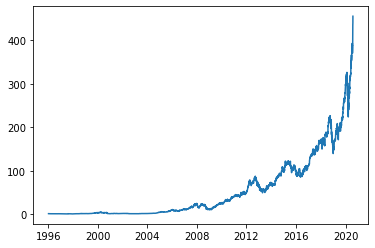

In [222]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

plt.plot(apple['Close'].dropna())
plt.show()

In [205]:
apple.fillna(method='ffill', inplace=True)

In [209]:
np.isfinite(apple.all())

Open           True
High           True
Low            True
Close          True
Volume         True
Close Price    True
20_SMA         True
50_SMA         True
Signal         True
Position       True
Macd           True
Signal         True
Hist           True
RSI_14         True
Upper_BB       True
Lower_BB       True
dtype: bool

In [223]:
X = apple.loc[:,apple.columns !=  'Close'] 
y = apple['Close']
train_X, test_X, train_y,test_y = train_test_split(X,y,test_size=0.25)
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
plt.plot(y)
plt.plot(trend)
plt.legend(['data', 'trend'])
plt.show()

ValueError: cannot reshape array of size 92820 into shape (6188,1)

# Feature engineering

## Moving Average Cross Strategy

In [153]:
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

def MovingAverage(df, start_date = '1996-01-02', end_date = '2020-08-06', 
                               short_window = 20, long_window = 50, moving_avg = 'SMA'):
    '''
    The function takes the dataset, time-duration of analysis, 
    look-back periods and the moving-average type(SMA or EMA) as input 
    and returns the respective MA Crossover chart along with the buy/sell signals for the given period.
    '''
    
    # start_date - (str)start analysis from this date (format: 'YYYY-MM-DD') Eg: '2018-01-01'
    # end_date - (str)end analysis on this date (format: 'YYYY-MM-DD') Eg: '2020-01-01'
    # short_window - (int)lookback period for short-term moving average. Eg: 5, 10, 20 
    # long_window - (int)lookback period for long-term moving average. Eg: 50, 100, 200
    # moving_avg - (str)the type of moving average to use ('SMA' or 'EMA')
    # display_table - (bool)whether to display the date and price table at buy/sell positions(True/False)
    
    
    df['Close Price'] = df.loc[start_date:end_date,'Close'] # assign new colun name
    df.dropna(axis = 0, inplace = True) # remove any null rows 
    
    # column names for long and short moving average columns
    short_window_col = str(short_window) + '_' + moving_avg
    long_window_col = str(long_window) + '_' + moving_avg  
  
    if moving_avg == 'SMA':
        # Create a short simple moving average column
        df[short_window_col] = df['Close Price'].rolling(window = short_window, min_periods = 1).mean()

        # Create a long simple moving average column
        df[long_window_col] = df['Close Price'].rolling(window = long_window, min_periods = 1).mean()

    elif moving_avg == 'EMA':
        # Create short exponential moving average column
        df[short_window_col] = df['Close Price'].ewm(span = short_window, adjust = False).mean()

        # Create a long exponential moving average column
        df[long_window_col] = df['Close Price'].ewm(span = long_window, adjust = False).mean()

    # create a new column 'Signal' such that if faster moving average is greater than slower moving average 
    # then set Signal as 1 else 0.
    df['Signal'] = 0.0  
    df['Signal'] = np.where(df[short_window_col] > df[long_window_col], 1.0, 0.0) 

    # create a new column 'Position' which is a day-to-day difference of the 'Signal' column. 
    df['Position'] = df['Signal'].diff()

In [154]:
MovingAverage(apple)

In [155]:
apple

,Open,High,Low,Close,Volume,Close Price,20_SMA,50_SMA,Signal,Position
Date,,,,,,,,,,
1996-01-02,1.151786,1.151786,1.133929,0.993233,34823600,0.993233,0.993233,0.993233,0.0,NaN
1996-01-03,1.142857,1.174107,1.138393,0.993233,107458400,0.993233,0.993233,0.993233,0.0,0.0
1996-01-04,1.156250,1.156250,1.120536,0.975842,75045600,0.975842,0.987436,0.987436,0.0,0.0
1996-01-05,1.129464,1.223214,1.120536,1.058933,111482000,1.058933,1.005310,1.005310,0.0,0.0
1996-01-08,1.232143,1.267857,1.214286,1.070527,30335200,1.070527,1.018354,1.018354,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,425.040009,93584200,425.040009,384.080501,358.486799,1.0,0.0
2020-08-03,432.799988,446.549988,431.570007,435.750000,77037800,435.750000,387.175501,360.864799,1.0,0.0
2020-08-04,436.529999,443.160004,433.549988,438.660004,43267900,438.660004,390.474001,363.260198,1.0,0.0


# MACD - Moving Average Convergence Divergence

In [156]:
# MACD Calculation
def get_macd(df, slow=26, fast=12, smooth=9, start_date = '1996-01-02', end_date = '2020-08-06',):
    
    # isolate the closing price
    closingPrice = df.loc[start_date:end_date,'Close']
    
    exp1 = closingPrice.ewm(span = fast, adjust = False).mean()
    exp2 = closingPrice.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Close':'Macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'Macd':'Signal'})
    hist = pd.DataFrame(macd['Macd'] - signal['Signal']).rename(columns = {0:'Hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df

get_macd(apple)

,Macd,Signal,Hist
Date,,,
1996-01-02,0.000000,0.000000,0.000000
1996-01-03,0.000000,0.000000,0.000000
1996-01-04,-0.001387,-0.000277,-0.001110
1996-01-05,0.004170,0.000612,0.003558
1996-01-08,0.009401,0.002370,0.007031
...,...,...,...
2020-07-31,9.681217,9.116100,0.565117
2020-08-03,12.863593,9.865598,2.997994
2020-08-04,15.442450,10.980969,4.461481


In [157]:
apple= pd.concat([apple,get_macd(apple)], axis=1)

In [158]:
apple

,Open,High,Low,Close,Volume,Close Price,20_SMA,50_SMA,Signal,Position,Macd,Signal,Hist
Date,,,,,,,,,,,,,
1996-01-02,1.151786,1.151786,1.133929,0.993233,34823600,0.993233,0.993233,0.993233,0.0,NaN,0.000000,0.000000,0.000000
1996-01-03,1.142857,1.174107,1.138393,0.993233,107458400,0.993233,0.993233,0.993233,0.0,0.0,0.000000,0.000000,0.000000
1996-01-04,1.156250,1.156250,1.120536,0.975842,75045600,0.975842,0.987436,0.987436,0.0,0.0,-0.001387,-0.000277,-0.001110
1996-01-05,1.129464,1.223214,1.120536,1.058933,111482000,1.058933,1.005310,1.005310,0.0,0.0,0.004170,0.000612,0.003558
1996-01-08,1.232143,1.267857,1.214286,1.070527,30335200,1.070527,1.018354,1.018354,0.0,0.0,0.009401,0.002370,0.007031
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,425.040009,93584200,425.040009,384.080501,358.486799,1.0,0.0,9.681217,9.116100,0.565117
2020-08-03,432.799988,446.549988,431.570007,435.750000,77037800,435.750000,387.175501,360.864799,1.0,0.0,12.863593,9.865598,2.997994
2020-08-04,436.529999,443.160004,433.549988,438.660004,43267900,438.660004,390.474001,363.260198,1.0,0.0,15.442450,10.980969,4.461481


# RSI 

In [159]:
# calculating RSI
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

apple['RSI_14'] = get_rsi(apple['Close'], 14)
apple = apple.dropna()
apple

,Open,High,Low,Close,Volume,Close Price,20_SMA,50_SMA,Signal,Position,Macd,Signal,Hist,RSI_14
Date,,,,,,,,,,,,,,
1996-01-09,1.236607,1.236607,1.169643,1.012557,62804000,1.012557,1.017387,1.017387,0.0,0.0,0.008768,0.003650,0.005119,53.407683
1996-01-10,1.160714,1.241071,1.151786,1.058933,91358400,1.058933,1.023323,1.023323,0.0,0.0,0.011872,0.005294,0.006578,64.800574
1996-01-11,1.165179,1.250000,1.156250,1.082122,189184800,1.082122,1.030672,1.030672,0.0,0.0,0.016018,0.007439,0.008579,68.896085
1996-01-12,1.241071,1.241071,1.187500,1.047339,100464000,1.047339,1.032524,1.032524,0.0,0.0,0.016309,0.009213,0.007096,57.995781
1996-01-15,1.205357,1.232143,1.191964,1.055069,90770400,1.055069,1.034779,1.034779,0.0,0.0,0.016968,0.010764,0.006204,59.528255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,425.040009,93584200,425.040009,384.080501,358.486799,1.0,0.0,9.681217,9.116100,0.565117,73.800091
2020-08-03,432.799988,446.549988,431.570007,435.750000,77037800,435.750000,387.175501,360.864799,1.0,0.0,12.863593,9.865598,2.997994,76.287956
2020-08-04,436.529999,443.160004,433.549988,438.660004,43267900,438.660004,390.474001,363.260198,1.0,0.0,15.442450,10.980969,4.461481,76.928993


# Bollinger Band

In [160]:
def BollingerBand(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

In [161]:
apple['Upper_BB'], apple['Lower_BB'] = BollingerBand(apple['Close'], apple['50_SMA'], 50)

In [162]:
apple.dropna()

,Open,High,Low,Close,Volume,Close Price,20_SMA,50_SMA,Signal,Position,Macd,Signal,Hist,RSI_14,Upper_BB,Lower_BB
Date,,,,,,,,,,,,,,,,
1996-03-19,0.941964,0.946429,0.915179,0.796132,31091200,0.796132,0.836809,0.896615,0.0,0.0,-0.028625,-0.029518,0.000893,35.935417,1.062733,0.730497
1996-03-20,0.919643,0.919643,0.897321,0.780674,28996800,0.780674,0.830045,0.891977,0.0,0.0,-0.028918,-0.029398,0.000480,32.791376,1.057831,0.726124
1996-03-21,0.910714,0.910714,0.892857,0.776809,27496000,0.776809,0.822702,0.886335,0.0,0.0,-0.029126,-0.029344,0.000217,32.036642,1.048152,0.724518
1996-03-22,0.901786,0.906250,0.888393,0.784538,26891200,0.784538,0.815746,0.880383,0.0,0.0,-0.028341,-0.029143,0.000802,35.246288,1.034516,0.726251
1996-03-25,0.910714,0.919643,0.857143,0.742026,41092800,0.742026,0.807244,0.874277,0.0,0.0,-0.030794,-0.029473,-0.001321,27.541749,1.025578,0.722976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,425.040009,93584200,425.040009,384.080501,358.486799,1.0,0.0,9.681217,9.116100,0.565117,73.800091,411.061563,305.912034
2020-08-03,432.799988,446.549988,431.570007,435.750000,77037800,435.750000,387.175501,360.864799,1.0,0.0,12.863593,9.865598,2.997994,76.287956,416.423947,305.305650
2020-08-04,436.529999,443.160004,433.549988,438.660004,43267900,438.660004,390.474001,363.260198,1.0,0.0,15.442450,10.980969,4.461481,76.928993,421.686393,304.834004


In [163]:
# Do I need to calculate the percenatge changes price for the stock?

# Plot the ACF and PACF charts and find the optimal parameters
The next step is to determine the tuning parameters of the model by looking at the autocorrelation and partial autocorrelation graphs.

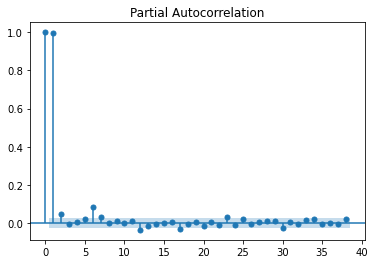

In [177]:
# PACF Plot
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(apple['Close'].dropna())

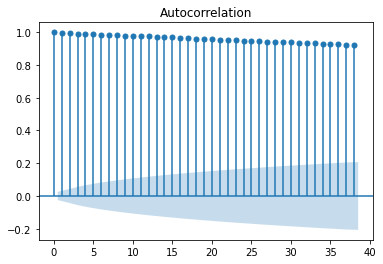

In [178]:
from statsmodels.graphics.tsaplots import plot_acf
acf=plot_acf(apple['Close'].dropna())

In [187]:
# taking the lag observation (e.g. t-1) as inputs and using the current observation (t) as the output variable.
from pandas import DataFrame
apple_df = DataFrame()
for i in range(12,0,-1):
	apple_df['t-'+str(i)] = apple['Close'].shift(i).values
apple_df['t'] = apple['Close'].values
#print(dataframe.head(13))
apple_df.dropna()
#dataframe = dataframe[13:]
# save to new file
#dataframe.to_csv('lags_12months_features.csv', index=False)

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
12,1.012557,1.058933,1.082122,1.047339,1.055069,1.068595,1.051204,0.987436,0.923668,0.942992,0.977774,0.997098,0.935262
13,1.058933,1.082122,1.047339,1.055069,1.068595,1.051204,0.987436,0.923668,0.942992,0.977774,0.997098,0.935262,0.946856
14,1.082122,1.047339,1.055069,1.068595,1.051204,0.987436,0.923668,0.942992,0.977774,0.997098,0.935262,0.946856,0.900480
15,1.047339,1.055069,1.068595,1.051204,0.987436,0.923668,0.942992,0.977774,0.997098,0.935262,0.946856,0.900480,0.844441
16,1.055069,1.068595,1.051204,0.987436,0.923668,0.942992,0.977774,0.997098,0.935262,0.946856,0.900480,0.844441,0.854103
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6183,390.899994,386.089996,385.309998,393.429993,388.000000,389.089996,371.380005,370.459991,379.239990,373.010010,380.160004,384.760010,425.040009
6184,386.089996,385.309998,393.429993,388.000000,389.089996,371.380005,370.459991,379.239990,373.010010,380.160004,384.760010,425.040009,435.750000
6185,385.309998,393.429993,388.000000,389.089996,371.380005,370.459991,379.239990,373.010010,380.160004,384.760010,425.040009,435.750000,438.660004
6186,393.429993,388.000000,389.089996,371.380005,370.459991,379.239990,373.010010,380.160004,384.760010,425.040009,435.750000,438.660004,440.250000


# Scaling and splitting the data

In [219]:
# use a random seed, so I can reproduce easier later on
# Split into train and test data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

X = apple.loc[:,apple.columns !=  'Close']
Y = apple['Close']
train_X, test_X, train_y,test_y = train_test_split(X,Y,test_size=0.25)

In [228]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(4641, 15) (4641,)
(1547, 15) (1547,)


# Build Model

In [220]:
#Creating the Regressor
regressor = LinearRegression()
regressor.fit(train_X,train_y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Make Predictions

In [217]:
#Make Predictions and Evaluate the results
predict_y = regressor.predict(test_X)
print('Prediction Score : ' , regressor.score(test_X,test_y))
error = mean_squared_error(test_y,predict_y)
print('Mean Squared Error : ',error)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
#Plot the predicted and the expected values
fig = plt.figure()
ax = plt.axes()
ax.grid()
ax.set(xlabel='Close ($)',ylabel='Open ($)', title='Apple Stock Prediction using Linear Regression')
ax.plot(test_X['Open'],test_y)
ax.plot(test_X['Open'],predict_y)
fig.savefig('LRPlot.png')
plt.show()

In [ ]:
# Optimizing